In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.image as mpimg
from subprocess import Popen
import glob,os,time,sys,math,shutil
import numpy as np
import re
import pandas as pd
from IPython.display import display,clear_output
from matplotlib.ticker import FormatStrFormatter
from pylab import rcParams
import seaborn as sns
import matplotlib as mpl
from scipy.stats import gaussian_kde,kde,ks_2samp,entropy
timestr=time.strftime("%m%d")
from matplotlib import colormaps
import warnings
warnings.filterwarnings('ignore')

In [2]:
highsalt_drug_files=glob.glob('/Users/smritipradhan/Desktop/send_worknew/SE-DMU--3.5_Rmudrug--10.1_kd-0.0001/*dat')
print(len(highsalt_drug_files))

152


In [29]:
for file in highsalt_drug_files[0:10]:
    df=pd.read_csv(file, usecols=['sweep','NE'])
    ne_array=df['NE'].to_numpy()[-5:-1]
    print(np.mean(ne_array))

123.0
116.0
93.0
160.0
123.0
121.0
94.0
169.0
120.0
123.0


In [3]:
all_files_data_nt4=[]
max_length=[]
all_files_data_t4=[]
max_length=[]
for i, file in enumerate(highsalt_drug_files):
     # Start with fewer files
    try:
        #print(f"Processing file {i+1}: {os.path.basename(file)}")
        df = pd.read_csv(file,usecols=['sweep','NE'])
        ne_array=df['NE'].to_numpy()[-10:-1]
        if(np.mean(ne_array)>120):
            all_files_data_nt4.append(df)
            max_length.append(df['sweep'].iloc[-1]) 
        elif(np.mean(ne_array)==120):
            all_files_data_t4.append(df)
            max_length.append(df['sweep'].iloc[-1])
        else:
            continue
        del df

    
    except Exception as e:
        print(f"Error processing file {file}: {e}")
        continue

In [4]:
all_files_data_new_nt4=[]
max_sweep=np.max(max_length)

for df in all_files_data_nt4:
    if(df['sweep'].iloc[-1]<max_sweep):
        df_extended=pd.DataFrame(columns=['sweep','NE'])
        last_sweep=df['sweep'].iloc[-1] 
        df_extended['sweep']=np.arange(round(last_sweep,-2)+100,round(int(max_sweep),-2),100)
        df_extended['NE']=df['NE'].iloc[-1]
        df_new=pd.concat((df,df_extended),ignore_index=True)
        all_files_data_new_nt4.append(df_new)
        del df_extended
        del df_new
    else:
        all_files_data_new_nt4.append(df)
    del df 



In [5]:
all_files_data_new_t4=[]


for df in all_files_data_t4:
    if(df['sweep'].iloc[-1]<max_sweep):
        df_extended=pd.DataFrame(columns=['sweep','NE'])
        last_sweep=df['sweep'].iloc[-1] 
        df_extended['sweep']=np.arange(round(last_sweep,-2)+100,round(int(max_sweep),-2),100)
        df_extended['NE']=120
        df_new=pd.concat((df,df_extended),ignore_index=True)
        all_files_data_new_t4.append(df_new)
        del df_extended
        del df_new
    else:
        all_files_data_new_t4.append(df)
    del df



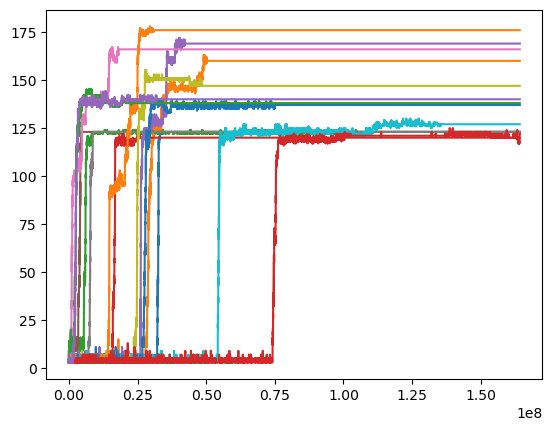

In [43]:
for df in all_files_data_new_nt4:
    plt.plot(df['sweep'], df['NE'], label='NE vs Sweep')

In [62]:
# Simple approach - just concatenate all data

combined_data_nt4=pd.DataFrame()
if all_files_data_new_nt4:
    # Concatenate all data
    combined_data_nt4 = pd.concat(all_files_data_new_nt4, ignore_index=True)
    #combined_data['seconds']=combined_data['seconds']*10**(-5) 
    # Group by sweep and calculate mean
    final_result_nt4=combined_data_nt4.groupby('sweep')['NE'].agg(['mean','count']).reset_index()
    final_result_nt4.columns=['Sweep','average_NE','count']
    #print("Final aggregated data:")
    #print(final_result.head(10))
    print(f"Total unique sweeps: {len(final_result_nt4)}")
else:
    print("No data was successfully processed")

Total unique sweeps: 48305069


In [63]:
# Simple approach - just concatenate all data

combined_data=pd.DataFrame()
if all_files_data_new_t4:
    # Concatenate all data
    combined_data = pd.concat(all_files_data_new_t4, ignore_index=True)
    #combined_data['seconds']=combined_data['seconds']*10**(-5) 
    # Group by sweep and calculate mean

    final_result_t4=combined_data.groupby('sweep')['NE'].agg(['mean','count']).reset_index()
    final_result_t4.columns=['Sweep','average_NE','count']
    #print("Final aggregated data:")
    #print(final_result.head(10))
    print(f"Total unique sweeps: {len(final_result_t4)}")
else:
    print("No data was successfully processed")

Total unique sweeps: 1620887


In [65]:
final_result_nt4_avg=final_result_nt4[final_result_nt4['count']>1]
final_result_t4_avg=final_result_t4[final_result_t4['count']>1]
print(final_result_nt4_avg)
print(final_result_t4_avg)


              Sweep  average_NE  count
0                 0    3.000000     87
1              1000    3.275862     87
2              2000    3.206897     87
3              3000    3.229885     87
4              4000    3.206897     87
...             ...         ...    ...
48305063  164217500  140.755814     86
48305064  164217600  140.755814     86
48305065  164217700  140.755814     86
48305066  164217800  140.755814     86
48305067  164217900  140.755814     86

[31694876 rows x 3 columns]
             Sweep  average_NE  count
0                0    3.000000     34
1             1000    3.176471     34
2             2000    3.058824     34
3             3000    3.294118     34
4             4000    3.294118     34
...            ...         ...    ...
1620882  164217500  120.000000     34
1620883  164217600  120.000000     34
1620884  164217700  120.000000     34
1620885  164217800  120.000000     34
1620886  164217900  120.000000     34

[1618395 rows x 3 columns]


In [66]:
final_result_nt4_avg.to_csv('./average_traj_highsalt_wdrug_nott4.csv',index=False)
final_result_t4_avg.to_csv('./average_traj_highsalt_wdrug_t4.csv',index=False)

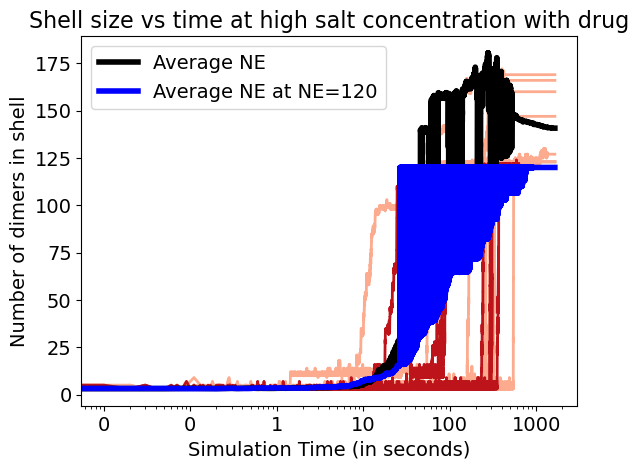

In [13]:
from IPython.display import clear_output
clear_output(wait=True)
import gc
gc.collect()

df_avg_t4=pd.read_csv('./average_traj_highsalt_wdrug_t4.csv')
df_avg_nt4=pd.read_csv('./average_traj_highsalt_wdrug_nott4.csv')
#final_resultn=df_avg[df_avg['count']>20]
markerarraystd=mpl.colormaps['Reds'](np.linspace(0.3,0.8,30))
count=0
for df in all_files_data_new_nt4[0:10]:
    plt.plot(df['sweep'], df['NE'], alpha=1.0, color=markerarraystd[0], linewidth=2,label=None)
    count+=1
count=0
for df in all_files_data_new_t4[0:10]:
    plt.plot(df['sweep'], df['NE'], alpha=1.0, color=markerarraystd[-1], linewidth=2,label=None)
    count+=1
 

#plt.xlim(0,5.0*10**6)
plt.xscale('log')
original_ticks = plt.xticks()[0]
new_labels = [f"{int(tick*10**(-5))}" for tick in original_ticks]
plt.xticks(ticks=original_ticks, labels=new_labels)

plt.plot(df_avg_nt4['Sweep'][::5], df_avg_nt4['average_NE'][::5], color='black', linewidth=4, label='Average NE')
plt.plot(df_avg_t4['Sweep'][::5], df_avg_t4['average_NE'][::5], color='blue', linewidth=4, label='Average NE at NE=120')
plt.xlabel('Simulation Time (in seconds)',fontsize=14)
plt.ylabel('Number of dimers in shell',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Shell size vs time at high salt concentration with drug', fontsize=16)
plt.legend(fontsize=14)
plt.savefig('shell_size_vs_time_highsalt_wdrug_alternate.png', dpi=300, bbox_inches='tight')

In [ ]:
markerarraystd=mpl.colormaps['Reds'](np.linspace(0.3,0.8,150))
count=0
for df in all_files_data_new[0:40]:
        #print(df['s'].iloc[-1])
        count+=1
        plt.plot(df['sweep'],df['NE'],color=markerarraystd[count],alpha=0.6)
plt.plot(final_resultn['Sweep'],final_resultn['average_NE'],color='black',linewidth=2,label='average trajectory')
#plt.xscale('log')
orginal_ticks = plt.xticks()[0]
new_labels = [f"{int(tick*10**(-5))}" for tick in orginal_ticks]
plt.xticks(orginal_ticks, new_labels)
plt.xlabel('seconds',fontsize=14)

plt.ylabel('NE',fontsize=14)
plt.title('NE vs sweep for std salt concentration without drug',fontsize=16)
plt.legend(fontsize=14,loc='lower right')
plt.show()

: 

In [63]:
# Percentile-based binning (equal frequency bins)
if all_files_data:
    combined_data = pd.concat(all_files_data, ignore_index=True)
    
    # Create quantile-based bins (e.g., 20 bins with equal number of data points)
    n_bins = 20
    combined_data['sweep_quantile'] = pd.qcut(
        combined_data['sweep'], 
        q=n_bins, 
        labels=False
    )
    
    # Get the actual sweep ranges for each quantile
    quantile_ranges = combined_data.groupby('sweep_quantile')['sweep'].agg(['min', 'max']).reset_index()
    quantile_ranges['sweep_range'] = quantile_ranges.apply(
        lambda row: f"{row['min']}-{row['max']}", axis=1
    )
    
    # Calculate statistics for each quantile
    quantile_stats = combined_data.groupby('sweep_quantile')['NE'].agg([
        'mean', 'std', 'count'
    ]).reset_index()
    
    # Merge the results
    quantile_result = pd.merge(quantile_ranges, quantile_stats, on='sweep_quantile')
    
    print("Quantile-based binning:")
    print(quantile_result[['sweep_range', 'mean', 'std', 'count']].head(10))

Quantile-based binning:
       sweep_range       mean        std  count
0         0-198000   5.893983   7.334998  97069
1    198100-396900   8.814403  15.782194  97060
2    397000-599200  10.691156  18.149975  97104
3    599300-805000  15.532179  25.376818  97065
4   805100-1023000  17.409310  28.544493  97056
5  1023100-1258200  19.850191  32.285162  97037
6  1258300-1523100  19.046852  33.148905  97072
7  1523200-1815000  15.287556  30.513054  97063
8  1815100-2127400  13.049959  25.774687  97079
9  2127500-2450800  18.243690  33.185885  97062


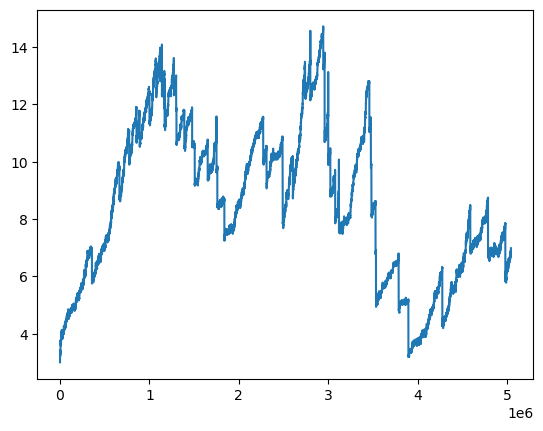

In [26]:
plt.plot(final_aggregated['sweep'],final_aggregated['average_NE'])

In [ ]:
files=glob.glob('0211-HPC/allenergy/*6.5*en*')
print(files)

plt.figure(figsize=[16,10])
#plt.xlim([0,80000])
plt.yticks([3,10,35,55,90,120],fontsize=20)
plt.ylabel('Numer of dimers',fontsize=20)
plt.xlabel('MC steps',fontsize=20)
plt.xticks(fontsize=20)
plt.grid(True)
t4=0
for fen in files:
    with open (fen,'r') as f:
        a=f.readlines()
        #a=list(f)
        lastframe=a[-1].split()[-2:]
        if lastframe==['42','120'] :
            t4+=1
            time=[]
            size=[]
            for each in a[1:]:
                time.append(int(each.split()[0]))
                size.append(int(each.split()[-1]))
            plt.plot(time,size)
            #plt.title('T4')
            #sys.exit()
#plt.title('T4, %d trajectories'%t4,fontsize=20);

#plt.figure(figsize=[20,5])
#plt.xlim([0,80000])
plt.yticks([3,10,35,55,90,120],fontsize=20)
plt.ylabel('Numer of dimers',fontsize=20)
plt.xlabel('MC steps',fontsize=20)
plt.xticks(fontsize=20)
plt.grid(True)
t3=0
for fen in files:
    with open (fen,'r') as f:
        a=f.readlines()
        #a=list(f)
        lastframe=a[-1].split()[-2:]
        if lastframe==['32','90']:
            t3+=1
            time=[]
            size=[]
            for each in a[1:]:
                time.append(int(each.split()[0]))
                size.append(int(each.split()[-1]))
            plt.plot(time,size,'k')
            plt.xlim([0,100000])
plt.tight_layout()            
#plt.title('T3, %d trajectories'%t3,fontsize=20);
#plt.savefig('../../TrajectoriesT3T4-02.png',dpi=300)
            #sys.exit()            